# Problem 14

In [223]:
import pandas as pd
import numpy as np

"""
just copy the path to the auto data set into here, but this should work ...
...I don't know where you have the auto data set saved in your computer is all.
"""
PATH = "/content/Auto.csv"

df = pd.read_csv(PATH)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [224]:
df = df.drop(df[df['horsepower'] == "?"].index)

In [225]:
mpg_median = df['mpg'].median()
mpg_median

22.75

In [226]:
#14a

df['mpg01'] = np.where(df['mpg'] > mpg_median, 1, 0)
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
386,38.0,6,262.0,85,3015,17.0,82,1,oldsmobile cutlass ciera (diesel),1
252,19.2,6,231.0,105,3535,19.2,78,1,pontiac phoenix lj,0
102,26.0,4,97.0,46,1950,21.0,73,2,volkswagen super beetle,1
240,30.5,4,97.0,78,2190,14.1,77,2,volkswagen dasher,1
204,32.0,4,85.0,70,1990,17.0,76,3,datsun b-210,1
140,14.0,8,304.0,150,4257,15.5,74,1,amc matador (sw),0
383,32.0,4,91.0,67,1965,15.7,82,3,honda civic (auto),1
261,18.1,6,258.0,120,3410,15.1,78,1,amc concord d/l,0
224,15.0,8,302.0,130,4295,14.9,77,1,mercury cougar brougham,0
339,26.6,4,151.0,84,2635,16.4,81,1,buick skylark,1


In [227]:
for feature in df.columns:
  if feature != 'name':
    df[feature] = df[feature].astype('float')

df.dtypes

,0
mpg,float64
cylinders,float64
displacement,float64
horsepower,float64
weight,float64
acceleration,float64
year,float64
origin,float64
name,object
mpg01,float64


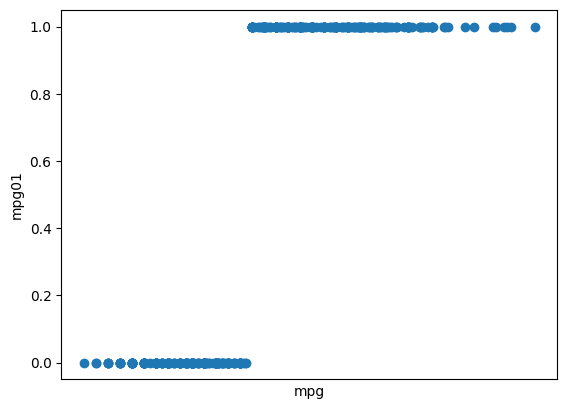

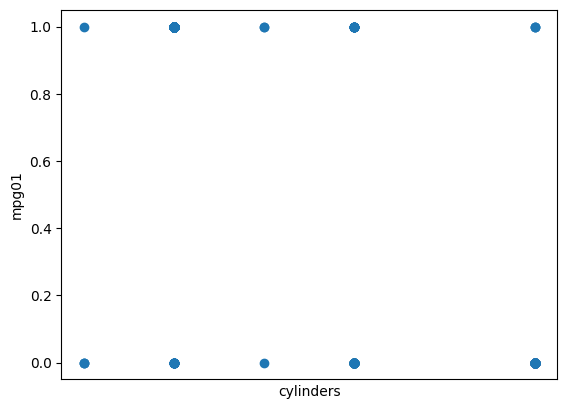

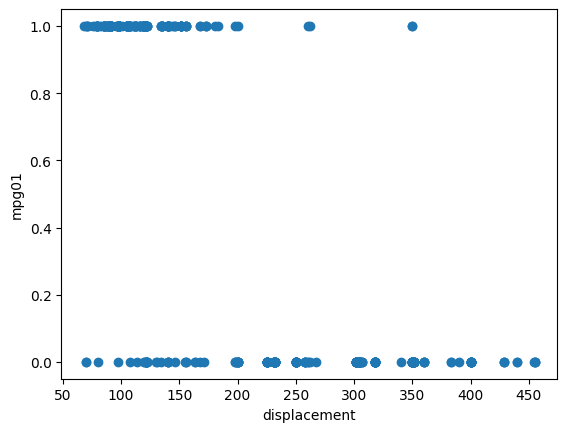

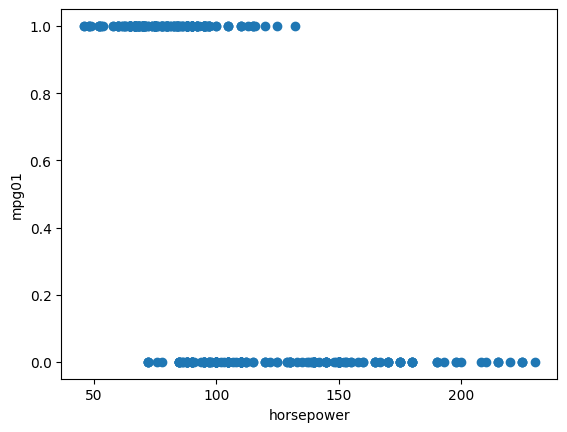

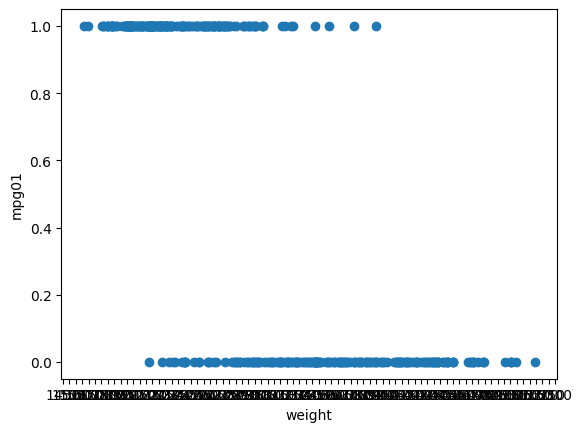

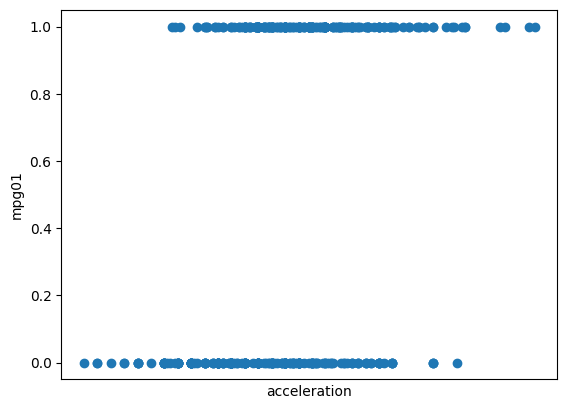

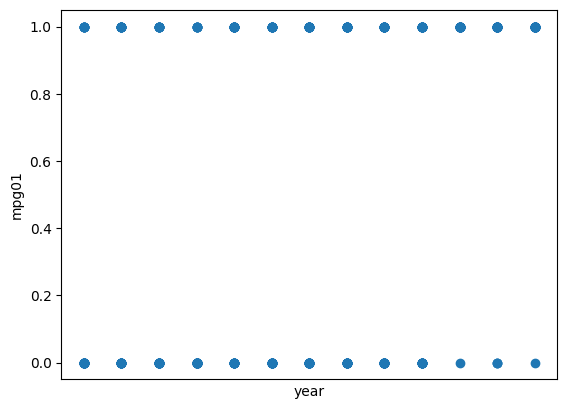

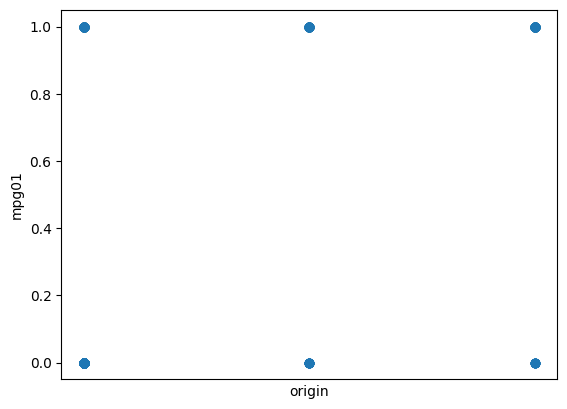

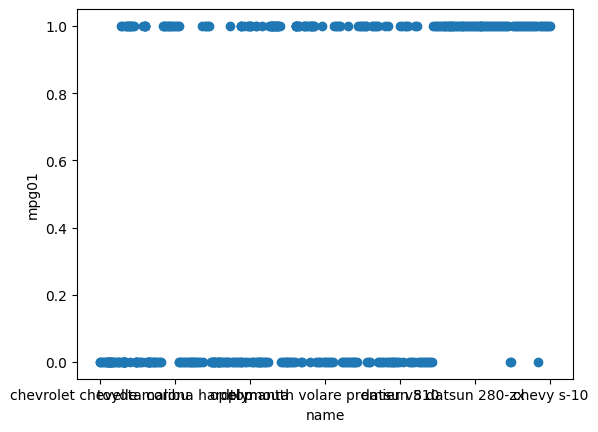

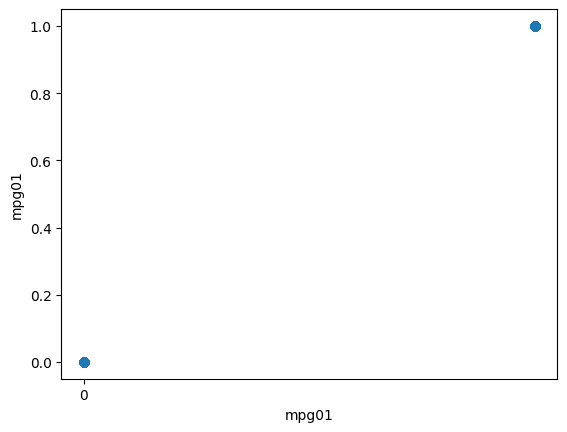

In [228]:
#14b

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

for feature in df.columns:
  X = df[feature]
  y = df['mpg01']

  fig, ax = plt.subplots()
  ax.scatter(X, y)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(50))

  ax.set_xlabel(feature)
  ax.set_ylabel('mpg01')

  plt.show()

**14b:** it seems like theres some correlation, varried as it may be, between mpg01 and: mpg, displacement, horsepower, weight, acceleration, and even a tiny bit with name.

In [229]:
df = df.drop('name', axis=1)

<Axes: >

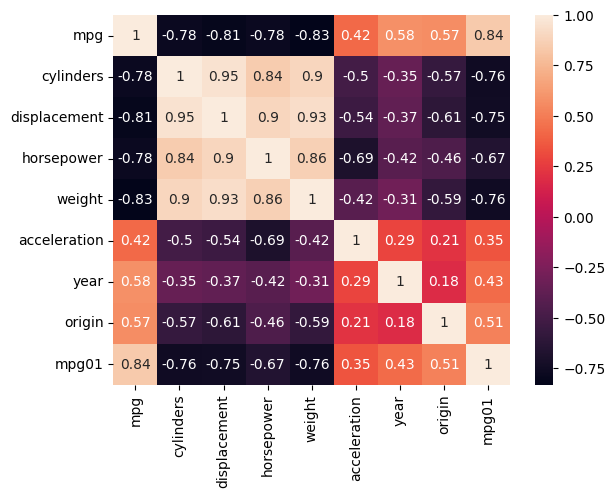

In [230]:
import seaborn as sns

corr_table = df.corr()
sns.heatmap(corr_table, annot=True)

it seems the 4 most correlated to mpg01 were: *mpg*, *cylinders*, *displacement*, and *weight*



In [231]:
#14c

from sklearn.model_selection import train_test_split

X = np.asarray(df[['mpg', 'cylinders', 'displacement', 'weight']])
y = np.asarray(df['mpg01'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (313, 4) (313,)
Test set: (79, 4) (79,)


In [232]:
#14d

from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

y_hat = lda.predict(X_test)

error = np.sum((y_hat - y_test)**2)
print('RSS:', error)

accuracy = accuracy_score(y_test, y_hat)
print(f'Accuracy: {accuracy}')

RSS: 2.0
Accuracy: 0.9746835443037974


In [233]:
#14e

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

y_hat = lda.predict(X_test)

error = np.sum((y_hat - y_test)**2)
print('RSS:', error)

accuracy = accuracy_score(y_test, y_hat)
print(f'Accuracy: {accuracy}')

RSS: 2.0
Accuracy: 0.9746835443037974


In [234]:
#14f

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_hat = lr.predict(X_test)

error = np.sum((y_hat - y_test)**2)
print('RSS:', error)

accuracy = accuracy_score(y_test, y_hat)
print(f'Accuracy: {accuracy}')

RSS: 0.0
Accuracy: 1.0


In [235]:
#14g

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

y_hat = nb.predict(X_test)

error = np.sum((y_hat - y_test)**2)
print('RSS:', error)

accuracy = accuracy_score(y_test, y_hat)
print(f'Accuracy: {accuracy}')

RSS: 3.0
Accuracy: 0.9620253164556962


In [236]:
#14h

from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 10):
  knn = KNeighborsClassifier(k)

  knn.fit(X_train, y_train)

  y_hat = knn.predict(X_test)

  error = np.sum((y_hat - y_test)**2)
  print('RSS for K =', str(k) + ':', error)

  accuracy = accuracy_score(y_test, y_hat)
  print('Accuracy for K =',str(k) + ':', str(accuracy))
  print()

RSS for K = 1: 9.0
Accuracy for K = 1: 0.8860759493670886

RSS for K = 2: 12.0
Accuracy for K = 2: 0.8481012658227848

RSS for K = 3: 7.0
Accuracy for K = 3: 0.9113924050632911

RSS for K = 4: 9.0
Accuracy for K = 4: 0.8860759493670886

RSS for K = 5: 9.0
Accuracy for K = 5: 0.8860759493670886

RSS for K = 6: 8.0
Accuracy for K = 6: 0.8987341772151899

RSS for K = 7: 8.0
Accuracy for K = 7: 0.8987341772151899

RSS for K = 8: 8.0
Accuracy for K = 8: 0.8987341772151899

RSS for K = 9: 9.0
Accuracy for K = 9: 0.8860759493670886



**14h:** It seems that K = 6 was the best fit for this data. Even though K = 3 has the same RSS and accuracy score (fraction of correct predictions), K = 6 is surrounded by K values with overall better errors than the K values surrounding K = 3.

# Problem 16

In [237]:
import pandas as pd
import numpy as np

"""
just copy the path to the auto data set into here, but this should work ...
...I don't know where you have the auto data set saved in your computer is all.
"""
PATH = "/content/housing.csv"

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv(PATH, delimiter=r"\s+", names=column_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [238]:
for feature in df.columns:
  df[feature] = df[feature].astype('float')

df.dtypes

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,float64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,float64
TAX,float64


In [239]:
crime_median = df['CRIM'].median()
crime_median

0.25651

In [240]:
df['is_above_CRIM_med'] = np.where(df['CRIM'] > crime_median, 1, 0)
df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,is_above_CRIM_med
382,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3,1
250,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90,24.4,0
413,28.65580,0.0,18.10,0.0,0.597,5.155,100.0,1.5894,24.0,666.0,20.2,210.97,20.08,16.3,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5,1
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0,0
57,0.01432,100.0,1.32,0.0,0.411,6.816,40.5,8.3248,5.0,256.0,15.1,392.90,3.95,31.6,0
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8,0
210,0.17446,0.0,10.59,1.0,0.489,5.960,92.1,3.8771,4.0,277.0,18.6,393.25,17.27,21.7,0
195,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0,0


<Axes: >

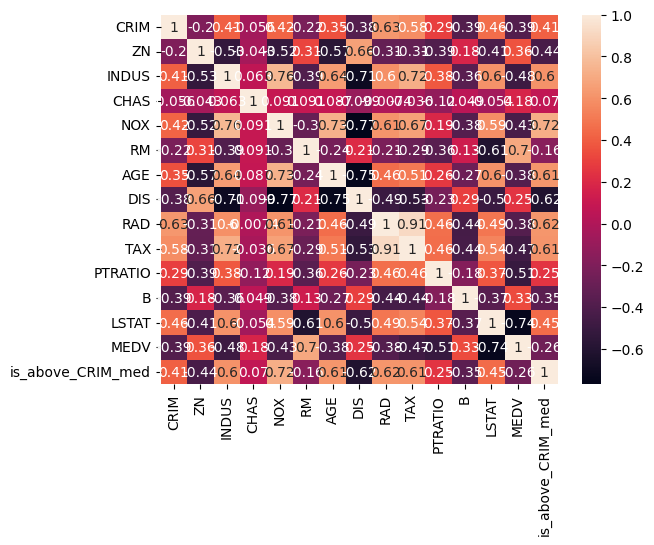

In [241]:
import seaborn as sns

corr_table = df.corr()
sns.heatmap(corr_table, annot=True)

it seems the most correlated to is_above_CRIME_med were: *NOX*, *INDUS*, *AGE*, *RAD*, *TAX*, *DIS*


In [242]:
"""
The list of featrures we will choose from among all our trials
"""
correlated_vars = ['NOX', 'INDUS', 'AGE', 'RAD', 'TAX', 'DIS']

"""
This is to select the features that will be used for a particular trial.
It works by selecting the feature among the 'correlated_vars' list that we
will NOT use.
"""
def select_vars(feature):
  return [var for var in correlated_vars if var != feature]

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [243]:
"""
Since the idea is to run several trials, each trying out different features,
I use 'not_this_feature' to denote the feature we're excluding for the current
trial.

This function runs all 4 models on the 5 features we select for the current
trial.
"""
def classification_models(not_this_feature):

  #Train-Test Split
  X = np.asarray(df[select_vars(not_this_feature)])
  y = np.asarray(df['is_above_CRIM_med'])

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
  print ('Train set:', X_train.shape,  y_train.shape)
  print ('Test set:', X_test.shape,  y_test.shape)
  print()



  #Logistic Regression
  from sklearn.linear_model import LogisticRegression

  lr = LogisticRegression()

  lr.fit(X_train, y_train)

  y_hat = lr.predict(X_test)

  error = np.sum((y_hat - y_test)**2)
  print('RSS lr:', error)

  accuracy = accuracy_score(y_test, y_hat)
  print(f'Accuracy lr: {accuracy}')
  print()



  #LDA
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

  lda = LinearDiscriminantAnalysis()

  lda.fit(X_train, y_train)

  y_hat = lda.predict(X_test)

  error = np.sum((y_hat - y_test)**2)
  print('RSS lda:', error)

  accuracy = accuracy_score(y_test, y_hat)
  print(f'Accuracy lda: {accuracy}')
  print()



  #Naive Bayes
  from sklearn.naive_bayes import GaussianNB

  nb = GaussianNB()

  nb.fit(X_train, y_train)

  y_hat = nb.predict(X_test)

  error = np.sum((y_hat - y_test)**2)
  print('RSS naive bayes:', error)

  accuracy = accuracy_score(y_test, y_hat)
  print(f'Accuracy naive bayes: {accuracy}')
  print()



  #KNN
  from sklearn.neighbors import KNeighborsClassifier

  for k in range(1, 10):
    knn = KNeighborsClassifier(k)

    knn.fit(X_train, y_train)

    y_hat = knn.predict(X_test)

    error = np.sum((y_hat - y_test)**2)
    print('RSS knn for K =', str(k) + ':', error)

    accuracy = accuracy_score(y_test, y_hat)
    print('Accuracy knn for K =',str(k) + ':', str(accuracy))
    print()

In [244]:
#With NOX, INDUS, AGE, RAD, TAX
classification_models('DIS')

Train set: (404, 5) (404,)
Test set: (102, 5) (102,)

RSS lr: 17
Accuracy lr: 0.8333333333333334

RSS lda: 19
Accuracy lda: 0.8137254901960784

RSS naive bayes: 20
Accuracy naive bayes: 0.803921568627451

RSS knn for K = 1: 14
Accuracy knn for K = 1: 0.8627450980392157

RSS knn for K = 2: 12
Accuracy knn for K = 2: 0.8823529411764706

RSS knn for K = 3: 13
Accuracy knn for K = 3: 0.8725490196078431

RSS knn for K = 4: 12
Accuracy knn for K = 4: 0.8823529411764706

RSS knn for K = 5: 12
Accuracy knn for K = 5: 0.8823529411764706

RSS knn for K = 6: 12
Accuracy knn for K = 6: 0.8823529411764706

RSS knn for K = 7: 12
Accuracy knn for K = 7: 0.8823529411764706

RSS knn for K = 8: 12
Accuracy knn for K = 8: 0.8823529411764706

RSS knn for K = 9: 14
Accuracy knn for K = 9: 0.8627450980392157



KNN performed far better than the other ones here. Specifically, K = 6, which is surrounded by other good choices for K, while still being the best value.

In [245]:
#With NOX, INDUS, AGE, RAD, DIS
classification_models('TAX')

Train set: (404, 5) (404,)
Test set: (102, 5) (102,)

RSS lr: 20
Accuracy lr: 0.803921568627451

RSS lda: 19
Accuracy lda: 0.8137254901960784

RSS naive bayes: 20
Accuracy naive bayes: 0.803921568627451

RSS knn for K = 1: 24
Accuracy knn for K = 1: 0.7647058823529411

RSS knn for K = 2: 15
Accuracy knn for K = 2: 0.8529411764705882

RSS knn for K = 3: 15
Accuracy knn for K = 3: 0.8529411764705882

RSS knn for K = 4: 16
Accuracy knn for K = 4: 0.8431372549019608

RSS knn for K = 5: 17
Accuracy knn for K = 5: 0.8333333333333334

RSS knn for K = 6: 15
Accuracy knn for K = 6: 0.8529411764705882

RSS knn for K = 7: 18
Accuracy knn for K = 7: 0.8235294117647058

RSS knn for K = 8: 18
Accuracy knn for K = 8: 0.8235294117647058

RSS knn for K = 9: 20
Accuracy knn for K = 9: 0.803921568627451



It seems like TAX was more important than DIS, since it did worse all around, even though KNN with K = 6 was also the best here.

In [246]:
#With NOX, INDUS, AGE, TAX, DIS
classification_models('RAD')

Train set: (404, 5) (404,)
Test set: (102, 5) (102,)

RSS lr: 20
Accuracy lr: 0.803921568627451

RSS lda: 19
Accuracy lda: 0.8137254901960784

RSS naive bayes: 25
Accuracy naive bayes: 0.7549019607843137

RSS knn for K = 1: 15
Accuracy knn for K = 1: 0.8529411764705882

RSS knn for K = 2: 12
Accuracy knn for K = 2: 0.8823529411764706

RSS knn for K = 3: 13
Accuracy knn for K = 3: 0.8725490196078431

RSS knn for K = 4: 12
Accuracy knn for K = 4: 0.8823529411764706

RSS knn for K = 5: 12
Accuracy knn for K = 5: 0.8823529411764706

RSS knn for K = 6: 12
Accuracy knn for K = 6: 0.8823529411764706

RSS knn for K = 7: 12
Accuracy knn for K = 7: 0.8823529411764706

RSS knn for K = 8: 12
Accuracy knn for K = 8: 0.8823529411764706

RSS knn for K = 9: 14
Accuracy knn for K = 9: 0.8627450980392157



About as good as excluding DIS, though Naive Bayes did worse here than when excluding DIS. KNN with K = 6 is still the best.

In [247]:
#With NOX, INDUS, RAD, TAX, DIS
classification_models('AGE')

Train set: (404, 5) (404,)
Test set: (102, 5) (102,)

RSS lr: 15
Accuracy lr: 0.8529411764705882

RSS lda: 19
Accuracy lda: 0.8137254901960784

RSS naive bayes: 19
Accuracy naive bayes: 0.8137254901960784

RSS knn for K = 1: 5
Accuracy knn for K = 1: 0.9509803921568627

RSS knn for K = 2: 5
Accuracy knn for K = 2: 0.9509803921568627

RSS knn for K = 3: 6
Accuracy knn for K = 3: 0.9411764705882353

RSS knn for K = 4: 5
Accuracy knn for K = 4: 0.9509803921568627

RSS knn for K = 5: 6
Accuracy knn for K = 5: 0.9411764705882353

RSS knn for K = 6: 6
Accuracy knn for K = 6: 0.9411764705882353

RSS knn for K = 7: 8
Accuracy knn for K = 7: 0.9215686274509803

RSS knn for K = 8: 7
Accuracy knn for K = 8: 0.9313725490196079

RSS knn for K = 9: 11
Accuracy knn for K = 9: 0.8921568627450981



Excluding AGE seems to have worked the best by far. This time KNN is best with K = 2, but logistic regression also did well.

In [248]:
#With NOX, AGE, RAD, TAX, DIS
classification_models('INDUS')

Train set: (404, 5) (404,)
Test set: (102, 5) (102,)

RSS lr: 18
Accuracy lr: 0.8235294117647058

RSS lda: 18
Accuracy lda: 0.8235294117647058

RSS naive bayes: 19
Accuracy naive bayes: 0.8137254901960784

RSS knn for K = 1: 15
Accuracy knn for K = 1: 0.8529411764705882

RSS knn for K = 2: 12
Accuracy knn for K = 2: 0.8823529411764706

RSS knn for K = 3: 12
Accuracy knn for K = 3: 0.8823529411764706

RSS knn for K = 4: 12
Accuracy knn for K = 4: 0.8823529411764706

RSS knn for K = 5: 12
Accuracy knn for K = 5: 0.8823529411764706

RSS knn for K = 6: 12
Accuracy knn for K = 6: 0.8823529411764706

RSS knn for K = 7: 12
Accuracy knn for K = 7: 0.8823529411764706

RSS knn for K = 8: 12
Accuracy knn for K = 8: 0.8823529411764706

RSS knn for K = 9: 15
Accuracy knn for K = 9: 0.8529411764705882



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Excluding INDUS did pretty good, again. This time KNN with K = 5, not 6, is best.

In [249]:
#With INDUS, AGE, RAD, TAX, DIS
classification_models('NOX')

Train set:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 (404, 5) (404,)
Test set: (102, 5) (102,)

RSS lr: 17
Accuracy lr: 0.8333333333333334

RSS lda: 18
Accuracy lda: 0.8235294117647058

RSS naive bayes: 22
Accuracy naive bayes: 0.7843137254901961

RSS knn for K = 1: 15
Accuracy knn for K = 1: 0.8529411764705882

RSS knn for K = 2: 12
Accuracy knn for K = 2: 0.8823529411764706

RSS knn for K = 3: 13
Accuracy knn for K = 3: 0.8725490196078431

RSS knn for K = 4: 12
Accuracy knn for K = 4: 0.8823529411764706

RSS knn for K = 5: 12
Accuracy knn for K = 5: 0.8823529411764706

RSS knn for K = 6: 12
Accuracy knn for K = 6: 0.8823529411764706

RSS knn for K = 7: 12
Accuracy knn for K = 7: 0.8823529411764706

RSS knn for K = 8: 12
Accuracy knn for K = 8: 0.8823529411764706

RSS knn for K = 9: 14
Accuracy knn for K = 9: 0.8627450980392157



Surprisingly, excluding NOX, which had the highest correlation by far, did not make this trial too much better. This trial did about the same as the other ones: pretty good, with KNN K = 6 being the best.

**Conclusion:** Excluding AGE - that is, considering only the features: NOX, INDUS, RAD, TAX, DIS to predict whether CRIM will be above or below the median - made it so that our predictions worked best.